In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Config
DATA_FILES = {
    "train": "train_sent_emo.csv",
    "dev": "dev_sent_emo.csv",
    "test": "test_sent_emo.csv",
}
OUTPUT_DIR = "eda_outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)



In [2]:
def load_data():
    dfs = {}
    for split, fname in DATA_FILES.items():
        dfs[split] = pd.read_csv(fname)
    merged = pd.concat(dfs, names=["split", "row"])
    return dfs, merged

dfs, merged = load_data()
dfs["train"].head()


,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,also I was the point person on my companys tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731"
1,2,You mustve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442"
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389"
3,4,So lets talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572"
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917"


In [3]:
print("===== Basic Info =====")
for split, df in dfs.items():
    print(f"{split.capitalize()} size: {len(df)}")
print("\nColumns:", dfs["train"].columns.tolist())


===== Basic Info =====
Train size: 9989
Dev size: 1109
Test size: 2610

Columns: ['Sr No.', 'Utterance', 'Speaker', 'Emotion', 'Sentiment', 'Dialogue_ID', 'Utterance_ID', 'Season', 'Episode', 'StartTime', 'EndTime']


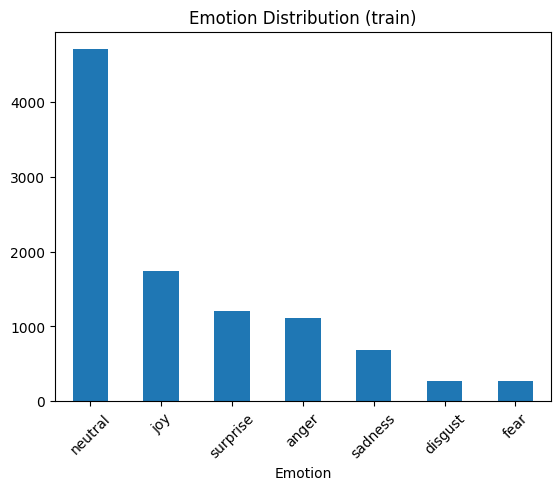

Train emotion counts:
Emotion
neutral     4710
joy         1743
surprise    1205
anger       1109
sadness      683
disgust      271
fear         268
Name: count, dtype: int64



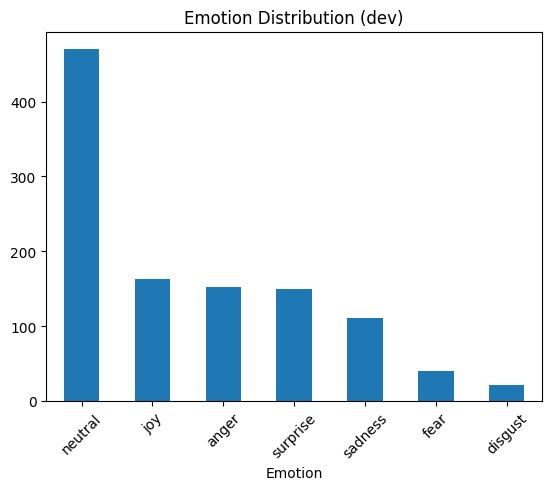

Dev emotion counts:
Emotion
neutral     470
joy         163
anger       153
surprise    150
sadness     111
fear         40
disgust      22
Name: count, dtype: int64



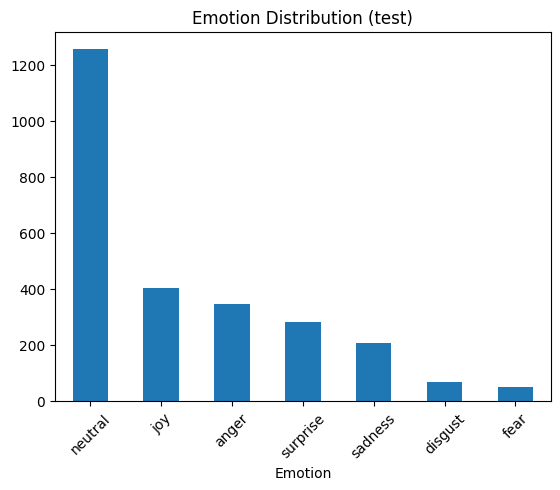

Test emotion counts:
Emotion
neutral     1256
joy          402
anger        345
surprise     281
sadness      208
disgust       68
fear          50
Name: count, dtype: int64



In [4]:
for split, df in dfs.items():
    counts = df["Emotion"].value_counts()
    counts.plot(kind="bar", rot=45, title=f"Emotion Distribution ({split})")
    plt.show()
    print(f"{split.capitalize()} emotion counts:\n{counts}\n")


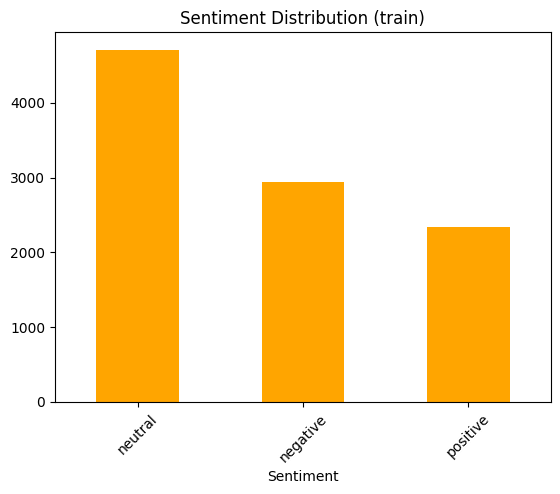

Train sentiment counts:
Sentiment
neutral     4710
negative    2945
positive    2334
Name: count, dtype: int64



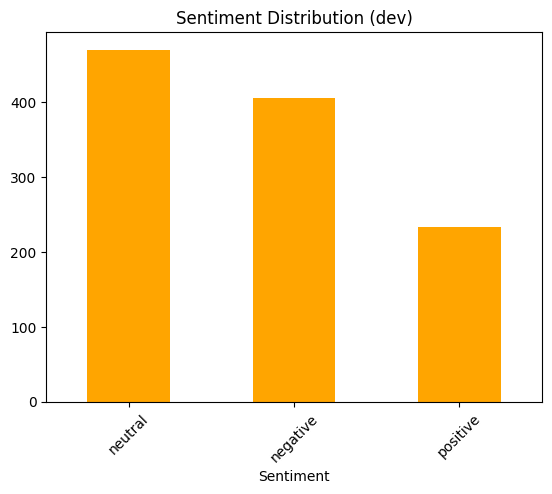

Dev sentiment counts:
Sentiment
neutral     470
negative    406
positive    233
Name: count, dtype: int64



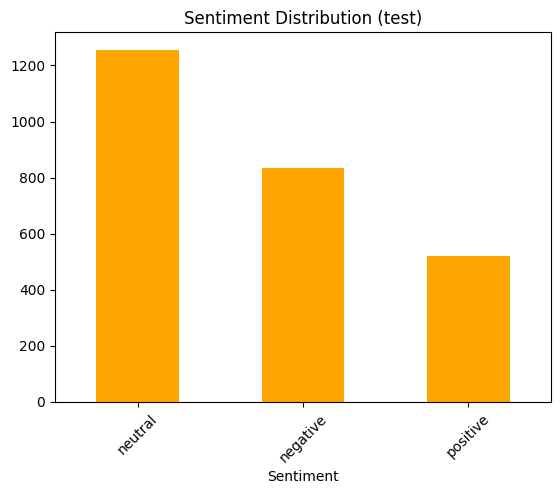

Test sentiment counts:
Sentiment
neutral     1256
negative     833
positive     521
Name: count, dtype: int64



In [5]:
for split, df in dfs.items():
    counts = df["Sentiment"].value_counts()
    counts.plot(kind="bar", rot=45, color="orange", title=f"Sentiment Distribution ({split})")
    plt.show()
    print(f"{split.capitalize()} sentiment counts:\n{counts}\n")


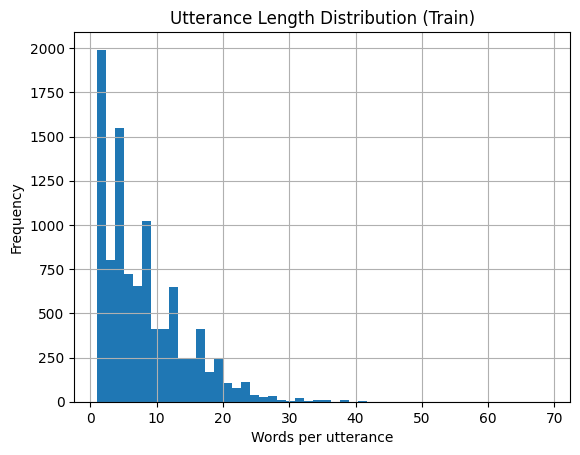

Average utterance length: 7.95805385924517
Max utterance length: 69


In [6]:
train_df = dfs["train"].copy()
train_df["utter_len"] = train_df["Utterance"].str.split().apply(len)

train_df["utter_len"].hist(bins=50)
plt.title("Utterance Length Distribution (Train)")
plt.xlabel("Words per utterance")
plt.ylabel("Frequency")
plt.show()

print("Average utterance length:", train_df["utter_len"].mean())
print("Max utterance length:", train_df["utter_len"].max())


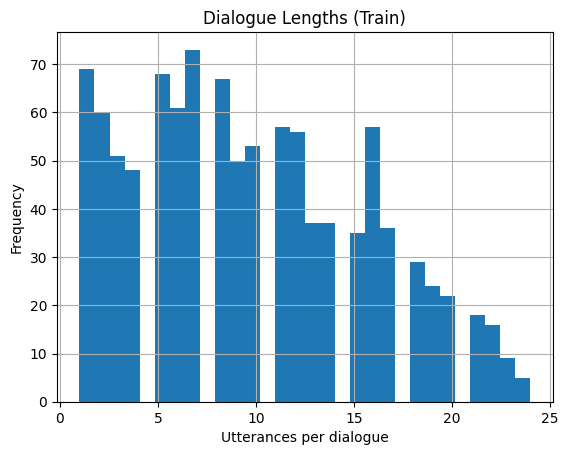

Average dialogue length: 9.719653179190752
Max dialogue length: 24


In [7]:
dialogue_sizes = train_df.groupby("Dialogue_ID")["Utterance_ID"].max() + 1

dialogue_sizes.hist(bins=30)
plt.title("Dialogue Lengths (Train)")
plt.xlabel("Utterances per dialogue")
plt.ylabel("Frequency")
plt.show()

print("Average dialogue length:", dialogue_sizes.mean())
print("Max dialogue length:", dialogue_sizes.max())


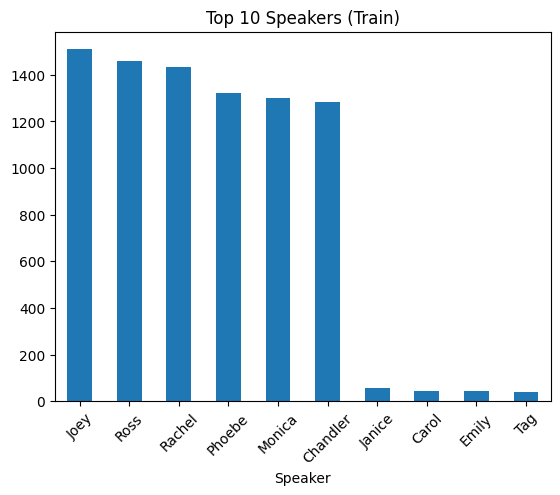

Top speakers:
 Speaker
Joey        1509
Ross        1459
Rachel      1435
Phoebe      1321
Monica      1299
Chandler    1283
Janice        58
Carol         46
Emily         43
Tag           41
Name: count, dtype: int64


In [8]:
top_speakers = train_df["Speaker"].value_counts().head(10)
top_speakers.plot(kind="bar", rot=45, title="Top 10 Speakers (Train)")
plt.show()

print("Top speakers:\n", top_speakers)


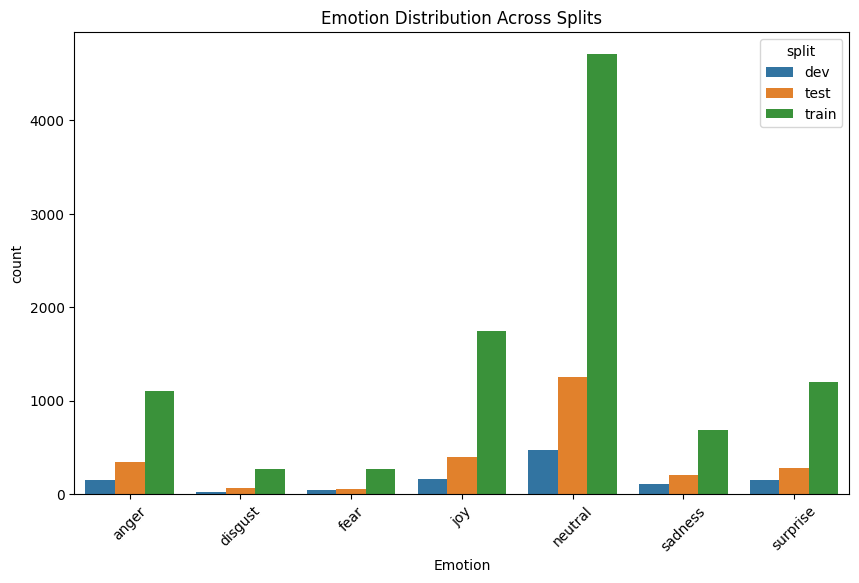

In [9]:
import seaborn as sns

emotion_dist = (
    merged.groupby(["split", "Emotion"])
    .size()
    .reset_index(name="count")
)

plt.figure(figsize=(10,6))
sns.barplot(x="Emotion", y="count", hue="split", data=emotion_dist)
plt.title("Emotion Distribution Across Splits")
plt.xticks(rotation=45)
plt.show()


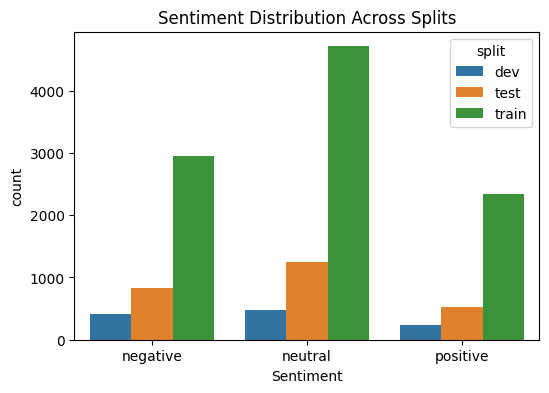

In [10]:
sent_dist = (
    merged.groupby(["split", "Sentiment"])
    .size()
    .reset_index(name="count")
)

plt.figure(figsize=(6,4))
sns.barplot(x="Sentiment", y="count", hue="split", data=sent_dist)
plt.title("Sentiment Distribution Across Splits")
plt.show()


Sentiment  negative  neutral  positive
Emotion                               
anger          1109        0         0
disgust         271        0         0
fear            268        0         0
joy               0        0      1743
neutral           0     4710         0
sadness         683        0         0
surprise        614        0       591


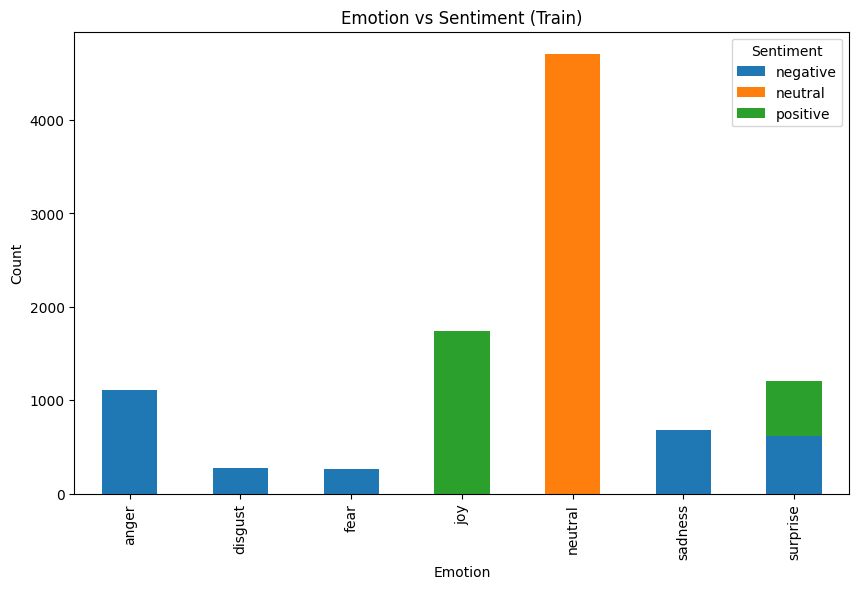

In [11]:
cross_tab = pd.crosstab(train_df["Emotion"], train_df["Sentiment"])
print(cross_tab)

cross_tab.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Emotion vs Sentiment (Train)")
plt.ylabel("Count")
plt.show()


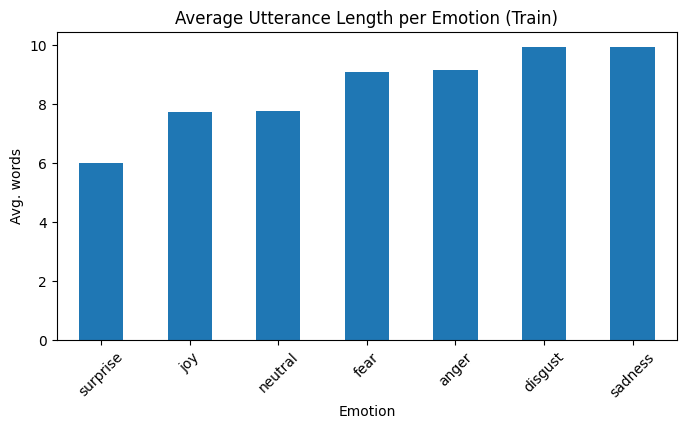

Emotion
surprise    6.016598
joy         7.745267
neutral     7.785563
fear        9.085821
anger       9.149684
disgust     9.948339
sadness     9.948755
Name: utter_len, dtype: float64


In [12]:
avg_len_by_emotion = train_df.groupby("Emotion")["utter_len"].mean().sort_values()
avg_len_by_emotion.plot(kind="bar", rot=45, figsize=(8,4))
plt.title("Average Utterance Length per Emotion (Train)")
plt.ylabel("Avg. words")
plt.show()
print(avg_len_by_emotion)


In [13]:
speaker_emotions = pd.crosstab(train_df["Speaker"], train_df["Emotion"])
top_speakers = train_df["Speaker"].value_counts().head(5).index
print(speaker_emotions.loc[top_speakers])


Emotion  anger  disgust  fear  joy  neutral  sadness  surprise
Speaker                                                       
Joey       169       39    37  279      705       82       198
Ross       162       24    43  263      719      104       144
Rachel     160       36    43  242      598      149       207
Phoebe     172       38    23  226      596      104       162
Monica     160       54    26  239      560       82       178


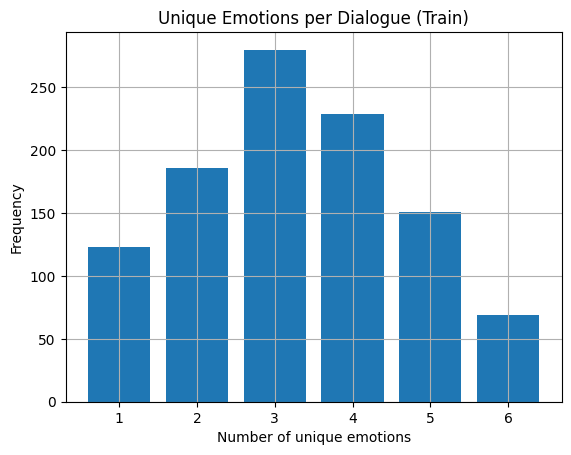

Average emotions per dialogue: 3.3034682080924855


In [14]:
dialogue_emotions = train_df.groupby("Dialogue_ID")["Emotion"].nunique()

dialogue_emotions.hist(bins=range(1,8), align="left", rwidth=0.8)
plt.title("Unique Emotions per Dialogue (Train)")
plt.xlabel("Number of unique emotions")
plt.ylabel("Frequency")
plt.show()

print("Average emotions per dialogue:", dialogue_emotions.mean())


In [21]:
# MELD Audio Feature Extraction and Correlation Analysis
# Jupyter Notebook Version

import pandas as pd
import numpy as np
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr, spearmanr
import os
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class MELDFeatureExtractor:
    """Extract comprehensive audio features from MELD dataset"""
    
    def __init__(self, target_sr=16000, max_length=8.0):
        self.target_sr = target_sr
        self.max_length = max_length
        self.feature_names = self._get_feature_names()
    
    def _get_feature_names(self):
        """Define names for all 120 features"""
        names = []
        
        # Pitch features (12)
        names.extend([
            'pitch_mean', 'pitch_std', 'pitch_range', 'pitch_median',
            'pitch_coeff_var', 'pitch_25th', 'pitch_75th', 'pitch_high_count',
            'pitch_low_count', 'pitch_variance', 'voiced_ratio', 'pitch_jitter'
        ])
        
        # Volume/Energy features (15)
        names.extend([
            'volume_mean', 'volume_std', 'volume_max', 'volume_min',
            'dynamic_range', 'volume_mean_db', 'volume_std_db', 'volume_median',
            'volume_25th', 'volume_75th', 'energy_variation', 'shimmer',
            'high_energy_frames', 'peak_energy_frames', 'power_mean'
        ])
        
        # Spectral features (20)
        names.extend([
            'spectral_centroid_mean', 'spectral_centroid_std', 'spectral_rolloff_mean',
            'spectral_rolloff_std', 'spectral_bandwidth_mean', 'spectral_bandwidth_std',
            'zcr_mean', 'zcr_std', 'spectral_flatness_mean', 'spectral_flatness_std',
            'spectral_centroid_max', 'spectral_centroid_min', 'spectral_centroid_median',
            'spectral_centroid_iqr', 'rolloff_centroid_ratio', 'bandwidth_centroid_ratio',
            'zcr_frequency', 'spectral_variability', 'spectral_centroid_variation',
            'spectral_rolloff_variation'
        ])
        
        # MFCC features (26)
        for i in range(13):
            names.append(f'mfcc_{i}_mean')
        for i in range(13):
            names.append(f'mfcc_{i}_delta')
        
        # Harmonic and Rhythm features (15)
        for i in range(12):
            names.append(f'chroma_{i}')
        names.extend(['tempo_bpm', 'rhythm_regularity', 'num_beats'])
        
        # Advanced features (32)
        for i in range(6):
            names.append(f'tonnetz_{i}')
        for i in range(13):
            names.append(f'mel_{i}')
        for i in range(7):
            names.append(f'spectral_contrast_{i}')
        names.extend([
            'harmonic_energy', 'percussive_energy', 'hpr_ratio',
            'harmonic_variability', 'percussive_variability', 'harmonic_ratio'
        ])
        
        return names
    
    def extract_features(self, audio_path):
        """Extract comprehensive audio features"""
        try:
            if not os.path.exists(audio_path):
                return np.zeros(120, dtype=np.float32)
            
            # Load audio
            y, sr = librosa.load(audio_path, sr=self.target_sr, duration=self.max_length)
            
            if len(y) == 0:
                return np.zeros(120, dtype=np.float32)
            
            # Ensure consistent length
            target_length = int(self.max_length * self.target_sr)
            if len(y) < target_length:
                y = np.pad(y, (0, target_length - len(y)))
            else:
                y = y[:target_length]
            
            features = []
            
            # 1. Pitch Features (12 features)
            try:
                pitches, magnitudes = librosa.piptrack(y=y, sr=sr, threshold=0.1)
                pitch_values = []
                for t in range(pitches.shape[1]):
                    index = magnitudes[:, t].argmax()
                    pitch = pitches[index, t]
                    if pitch > 0:
                        pitch_values.append(pitch)
                
                if pitch_values:
                    features.extend([
                        float(np.mean(pitch_values)),
                        float(np.std(pitch_values)),
                        float(max(pitch_values) - min(pitch_values)),
                        float(np.median(pitch_values)),
                        float(np.std(pitch_values) / np.mean(pitch_values)),
                        float(np.percentile(pitch_values, 25)),
                        float(np.percentile(pitch_values, 75)),
                        float(len([p for p in pitch_values if p > np.mean(pitch_values)])),
                        float(len([p for p in pitch_values if p < np.mean(pitch_values)])),
                        float(np.var(pitch_values)),
                        float(len(pitch_values) / len(y) * sr),
                        float(np.mean(np.abs(np.diff(pitch_values))))
                    ])
                else:
                    features.extend([0.0] * 12)
            except:
                features.extend([0.0] * 12)
            
            # 2. Volume/Energy Features (15 features)
            try:
                rms = librosa.feature.rms(y=y)[0]
                rms_db = librosa.amplitude_to_db(rms, ref=np.max)
                
                features.extend([
                    float(np.mean(rms)),
                    float(np.std(rms)),
                    float(np.max(rms)),
                    float(np.min(rms)),
                    float(np.max(rms) - np.min(rms)),
                    float(np.mean(rms_db)),
                    float(np.std(rms_db)),
                    float(np.median(rms)),
                    float(np.percentile(rms, 25)),
                    float(np.percentile(rms, 75)),
                    float(np.mean(np.abs(np.diff(rms)))),
                    float(np.std(rms) / np.mean(rms)),
                    float(len([r for r in rms if r > np.mean(rms)])),
                    float(np.sum(rms > np.percentile(rms, 90))),
                    float(np.mean(rms**2))
                ])
            except:
                features.extend([0.0] * 15)
            
            # 3. Spectral Features (20 features)
            try:
                spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
                spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]
                spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)[0]
                zcr = librosa.feature.zero_crossing_rate(y)[0]
                spectral_flatness = librosa.feature.spectral_flatness(y=y)[0]
                
                features.extend([
                    float(np.mean(spectral_centroids)),
                    float(np.std(spectral_centroids)),
                    float(np.mean(spectral_rolloff)),
                    float(np.std(spectral_rolloff)),
                    float(np.mean(spectral_bandwidth)),
                    float(np.std(spectral_bandwidth)),
                    float(np.mean(zcr)),
                    float(np.std(zcr)),
                    float(np.mean(spectral_flatness)),
                    float(np.std(spectral_flatness)),
                    float(np.max(spectral_centroids)),
                    float(np.min(spectral_centroids)),
                    float(np.median(spectral_centroids)),
                    float(np.percentile(spectral_centroids, 75) - np.percentile(spectral_centroids, 25)),
                    float(np.mean(spectral_rolloff / (spectral_centroids + 1e-8))),
                    float(np.mean(spectral_bandwidth / (spectral_centroids + 1e-8))),
                    float(np.mean(zcr * sr / 2)),
                    float(np.std(spectral_rolloff / (spectral_centroids + 1e-8))),
                    float(np.mean(np.abs(np.diff(spectral_centroids)))),
                    float(np.mean(np.abs(np.diff(spectral_rolloff))))
                ])
            except:
                features.extend([0.0] * 20)
            
            # 4. MFCC Features (26 features)
            try:
                mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
                delta_mfcc = librosa.feature.delta(mfcc)
                
                features.extend([float(np.mean(mfcc[i])) for i in range(13)])
                features.extend([float(np.mean(delta_mfcc[i])) for i in range(13)])
            except:
                features.extend([0.0] * 26)
            
            # 5. Harmonic and Rhythm Features (15 features)
            try:
                chroma = librosa.feature.chroma_stft(y=y, sr=sr)
                chroma_means = np.mean(chroma, axis=1)
                features.extend([float(x) for x in chroma_means])
                
                tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
                features.append(float(tempo))
                
                if len(beats) > 1:
                    beat_times = librosa.frames_to_time(beats, sr=sr)
                    inter_beat_intervals = np.diff(beat_times)
                    rhythm_regularity = np.std(inter_beat_intervals) / np.mean(inter_beat_intervals)
                    features.append(float(rhythm_regularity))
                else:
                    features.append(0.0)
                
                features.append(float(len(beats)))
            except:
                features.extend([0.0] * 15)
            
            # 6. Advanced Features (32 features)
            try:
                tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
                tonnetz_means = np.mean(tonnetz, axis=1)
                features.extend([float(x) for x in tonnetz_means])
                
                mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=13)
                mel_means = np.mean(mel_spec, axis=1)
                features.extend([float(x) for x in mel_means])
                
                spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
                contrast_means = np.mean(spectral_contrast, axis=1)
                features.extend([float(x) for x in contrast_means])
                
                y_harmonic, y_percussive = librosa.effects.hpss(y)
                harmonic_rms = np.mean(librosa.feature.rms(y=y_harmonic)[0])
                percussive_rms = np.mean(librosa.feature.rms(y=y_percussive)[0])
                hpr_ratio = harmonic_rms / (percussive_rms + 1e-8)
                
                features.extend([
                    float(harmonic_rms),
                    float(percussive_rms),
                    float(hpr_ratio),
                    float(np.std(librosa.feature.rms(y=y_harmonic)[0])),
                    float(np.std(librosa.feature.rms(y=y_percussive)[0])),
                    float(np.mean(y_harmonic**2) / np.mean(y**2))
                ])
            except:
                features.extend([0.0] * 32)
            
            # Ensure exactly 120 features
            features = features[:120]
            while len(features) < 120:
                features.append(0.0)
            
            return np.array(features, dtype=np.float32)
            
        except Exception as e:
            return np.zeros(120, dtype=np.float32)

# Initialize the feature extractor
extractor = MELDFeatureExtractor()

print("MELD Feature Extraction and Correlation Analysis")
print("=" * 60)
print(f"Audio feature extractor initialized with {len(extractor.feature_names)} features")

# Step 1: Extract features from MELD dataset
def extract_meld_features(sample_size=100):
    """Extract features from MELD dataset"""
    print(f"Extracting features from {sample_size if sample_size else 'all'} MELD samples...")
    
    datasets = {
        'train': ('train_sent_emo.csv', './train'),
        'dev': ('dev_sent_emo.csv', './dev_splits_complete'),
        'test': ('test_sent_emo.csv', './test_splits_complete')
    }
    
    all_data = []
    
    for split_name, (csv_file, audio_dir) in datasets.items():
        if not os.path.exists(csv_file):
            print(f"Warning: {csv_file} not found, skipping {split_name}")
            continue
            
        print(f"Processing {split_name} split...")
        df = pd.read_csv(csv_file)
        
        if sample_size and sample_size < len(df):
            df = df.sample(n=sample_size, random_state=42)
        
        for idx, row in tqdm(df.iterrows(), total=len(df), desc=f"Processing {split_name}"):
            dialogue_id = row['Dialogue_ID']
            utterance_id = row['Utterance_ID']
            audio_filename = f"dia{dialogue_id}_utt{utterance_id}.wav"
            audio_path = os.path.join(audio_dir, audio_filename)
            
            if not os.path.exists(audio_path):
                continue
            
            features = extractor.extract_features(audio_path)
            
            feature_dict = {}
            for i, feature_name in enumerate(extractor.feature_names):
                feature_dict[feature_name] = features[i]
            
            feature_dict.update({
                'split': split_name,
                'dialogue_id': dialogue_id,
                'utterance_id': utterance_id,
                'speaker': row['Speaker'],
                'emotion': row['Emotion'],
                'sentiment': row['Sentiment'],
                'utterance_text': row['Utterance'],
                'audio_path': audio_path
            })
            
            all_data.append(feature_dict)
    
    return pd.DataFrame(all_data)

# Step 2: Correlation analysis functions
def analyze_emotion_correlations(df):
    """Analyze correlations between features and emotions"""
    # Encode emotions
    le = LabelEncoder()
    df_analysis = df.copy()
    df_analysis['emotion_encoded'] = le.fit_transform(df_analysis['emotion'])
    
    # Calculate correlations
    correlations = []
    for feature in extractor.feature_names:
        if feature in df_analysis.columns:
            corr, p_value = pearsonr(df_analysis[feature], df_analysis['emotion_encoded'])
            correlations.append({
                'feature': feature,
                'correlation': corr,
                'abs_correlation': abs(corr),
                'p_value': p_value
            })
    
    corr_df = pd.DataFrame(correlations)
    corr_df = corr_df.sort_values('abs_correlation', ascending=False)
    
    return corr_df, le

def analyze_sentiment_correlations(df):
    """Analyze correlations between features and sentiments"""
    # Encode sentiments
    le = LabelEncoder()
    df_analysis = df.copy()
    df_analysis['sentiment_encoded'] = le.fit_transform(df_analysis['sentiment'])
    
    # Calculate correlations
    correlations = []
    for feature in extractor.feature_names:
        if feature in df_analysis.columns:
            corr, p_value = pearsonr(df_analysis[feature], df_analysis['sentiment_encoded'])
            correlations.append({
                'feature': feature,
                'correlation': corr,
                'abs_correlation': abs(corr),
                'p_value': p_value
            })
    
    corr_df = pd.DataFrame(correlations)
    corr_df = corr_df.sort_values('abs_correlation', ascending=False)
    
    return corr_df, le

# Step 3: Visualization functions
def plot_top_correlations(corr_df, title, top_n=20, figsize=(12, 8)):
    """Plot top feature correlations"""
    plt.figure(figsize=figsize)
    
    top_features = corr_df.head(top_n)
    colors = ['red' if x < 0 else 'blue' for x in top_features['correlation']]
    
    plt.barh(range(len(top_features)), top_features['correlation'], color=colors, alpha=0.7)
    plt.yticks(range(len(top_features)), top_features['feature'], fontsize=10)
    plt.xlabel('Correlation Coefficient')
    plt.title(f'{title} - Top {top_n} Features')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

def create_emotion_heatmap(df, emotion_corr_df, top_n=25):
    """Create heatmap of top features vs emotions"""
    # Get top features
    top_features = emotion_corr_df.head(top_n)['feature'].tolist()
    
    # Create emotion-feature matrix
    emotions = df['emotion'].unique()
    emotion_means = []
    
    for emotion in emotions:
        emotion_data = df[df['emotion'] == emotion]
        means = [emotion_data[feature].mean() for feature in top_features]
        emotion_means.append(means)
    
    # Normalize by z-score
    emotion_matrix = np.array(emotion_means)
    from scipy.stats import zscore
    emotion_matrix_norm = zscore(emotion_matrix, axis=0)
    
    plt.figure(figsize=(15, 8))
    sns.heatmap(emotion_matrix_norm, 
                xticklabels=top_features,
                yticklabels=emotions,
                cmap='RdBu_r',
                center=0,
                cbar_kws={'label': 'Z-score normalized values'})
    
    plt.title(f'Heatmap: Top {top_n} Features vs Emotions')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def plot_feature_distributions(df, features, by='emotion', figsize=(15, 10)):
    """Plot feature distributions by emotion/sentiment"""
    n_features = len(features)
    cols = 2
    rows = (n_features + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten() if n_features > 1 else [axes]
    
    for i, feature in enumerate(features):
        ax = axes[i]
        
        # Create boxplot
        categories = df[by].unique()
        data = [df[df[by] == cat][feature].values for cat in categories]
        
        ax.boxplot(data, labels=categories)
        ax.set_title(f'{feature} by {by}')
        ax.set_ylabel(feature)
        ax.tick_params(axis='x', rotation=45)
    
    # Hide empty subplots
    for i in range(n_features, len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Step 4: Interactive analysis
def interactive_analysis():
    """Run interactive correlation analysis"""
    print("Starting feature extraction...")
    
    # Check for existing data
    if os.path.exists('meld_features.csv'):
        print("Found existing feature file. Loading...")
        df = pd.read_csv('meld_features.csv')
        print(f"Loaded {len(df)} samples")
    else:
        print("Extracting features from audio files...")
        df = extract_meld_features(sample_size=200)  # Start with 200 samples
        df.to_csv('meld_features.csv', index=False)
        print(f"Extracted and saved {len(df)} samples")
    
    print(f"\nDataset overview:")
    print(f"Total samples: {len(df)}")
    print(f"Emotions: {df['emotion'].value_counts().to_dict()}")
    print(f"Sentiments: {df['sentiment'].value_counts().to_dict()}")
    
    # Analyze correlations
    print("\nAnalyzing emotion correlations...")
    emotion_corr, emotion_le = analyze_emotion_correlations(df)
    
    print("\nAnalyzing sentiment correlations...")
    sentiment_corr, sentiment_le = analyze_sentiment_correlations(df)
    
    return df, emotion_corr, sentiment_corr

# Ready to run!
print("\nReady to analyze MELD correlations!")
print("Run: df, emotion_corr, sentiment_corr = interactive_analysis()")

MELD Feature Extraction and Correlation Analysis
Audio feature extractor initialized with 120 features

Ready to analyze MELD correlations!
Run: df, emotion_corr, sentiment_corr = interactive_analysis()


In [22]:
df

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,Why do all youre coffee mugs have numbers on ...,Mark,surprise,positive,0,0,3,19,"00:14:38,127","00:14:40,378"
1,2,Oh. Thats so Monica can keep track. That way ...,Rachel,anger,negative,0,1,3,19,"00:14:40,629","00:14:47,385"
2,3,Y'know what?,Rachel,neutral,neutral,0,2,3,19,"00:14:56,353","00:14:57,520"
3,19,"Come on, Lydia, you can do it.",Joey,neutral,neutral,1,0,1,23,"0:10:44,769","0:10:46,146"
4,20,Push!,Joey,joy,positive,1,1,1,23,"0:10:46,146","0:10:46,833"
...,...,...,...,...,...,...,...,...,...,...,...
2605,2760,"Yeah, I mean, come on Ross, no one will even n...",Rachel,neutral,neutral,279,11,6,4,"00:14:35,457","00:14:40,211"
2606,2761,They’re not listening too me?,Ross,surprise,negative,279,12,6,4,"00:14:42,256","00:14:43,840"
2607,2762,Of course they’re listening to you! Everybody ...,Rachel,neutral,neutral,279,13,6,4,"00:14:44,008","00:14:48,511"
2608,2763,Monica you really think I should try this phas...,Ross,neutral,neutral,279,14,6,4,"00:14:48,138","00:14:52,390"


In [31]:
# MELD Feature Correlation Analysis in Jupyter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

# Load your CSV file
print("Loading MELD features...")
df = pd.read_csv('meld_features_sample.csv')  # Adjust filename if needed

print(f"Loaded dataframe with shape: {df.shape}")
print(f"Emotions: {df['emotion'].value_counts().to_dict()}")
print(f"Sentiments: {df['sentiment'].value_counts().to_dict()}")

# Get feature columns (first 120 columns)
feature_cols = df.columns[:120].tolist()
print(f"Number of audio features: {len(feature_cols)}")

# Encode emotions and sentiments for correlation analysis
le_emotion = LabelEncoder()
le_sentiment = LabelEncoder()

df['emotion_encoded'] = le_emotion.fit_transform(df['emotion'])
df['sentiment_encoded'] = le_sentiment.fit_transform(df['sentiment'])

print(f"\nEmotion encoding:")
for i, emotion in enumerate(le_emotion.classes_):
    print(f"  {emotion}: {i}")

print(f"\nSentiment encoding:")
for i, sentiment in enumerate(le_sentiment.classes_):
    print(f"  {sentiment}: {i}")

# Calculate correlations with emotions
print("\nCalculating emotion correlations...")
emotion_correlations = []
for feature in feature_cols:
    corr, p_value = pearsonr(df[feature], df['emotion_encoded'])
    emotion_correlations.append({
        'feature': feature,
        'correlation': corr,
        'abs_correlation': abs(corr),
        'p_value': p_value
    })

emotion_corr_df = pd.DataFrame(emotion_correlations)
emotion_corr_df = emotion_corr_df.sort_values('abs_correlation', ascending=False)

# Calculate correlations with sentiments
print("Calculating sentiment correlations...")
sentiment_correlations = []
for feature in feature_cols:
    corr, p_value = pearsonr(df[feature], df['sentiment_encoded'])
    sentiment_correlations.append({
        'feature': feature,
        'correlation': corr,
        'abs_correlation': abs(corr),
        'p_value': p_value
    })

sentiment_corr_df = pd.DataFrame(sentiment_correlations)
sentiment_corr_df = sentiment_corr_df.sort_values('abs_correlation', ascending=False)

# Display top correlations
print("\n" + "="*60)
print("TOP 15 FEATURES CORRELATED WITH EMOTIONS:")
print("="*60)
for i, row in emotion_corr_df.head(15).iterrows():
    significance = "***" if row['p_value'] < 0.001 else "**" if row['p_value'] < 0.01 else "*" if row['p_value'] < 0.05 else ""
    print(f"{row['feature']:35} : {row['correlation']:6.3f} {significance}")

print("\n" + "="*60)
print("TOP 15 FEATURES CORRELATED WITH SENTIMENTS:")
print("="*60)
for i, row in sentiment_corr_df.head(15).iterrows():
    significance = "***" if row['p_value'] < 0.001 else "**" if row['p_value'] < 0.01 else "*" if row['p_value'] < 0.05 else ""
    print(f"{row['feature']:35} : {row['correlation']:6.3f} {significance}")

Loading MELD features...
Loaded dataframe with shape: (400, 130)
Emotions: {'neutral': 182, 'joy': 63, 'anger': 58, 'surprise': 48, 'sadness': 29, 'fear': 11, 'disgust': 9}
Sentiments: {'neutral': 182, 'negative': 131, 'positive': 87}
Number of audio features: 120

Emotion encoding:
  anger: 0
  disgust: 1
  fear: 2
  joy: 3
  neutral: 4
  sadness: 5
  surprise: 6

Sentiment encoding:
  negative: 0
  neutral: 1
  positive: 2

Calculating emotion correlations...
Calculating sentiment correlations...

TOP 15 FEATURES CORRELATED WITH EMOTIONS:
pitch_range                         : -0.142 **
spectral_centroid_iqr               : -0.128 *
pitch_std                           : -0.120 *
pitch_mean                          : -0.117 *
volume_75th                         : -0.116 *
pitch_jitter                        : -0.110 *
zcr_std                             : -0.108 *
volume_std_db                       : -0.107 *
spectral_centroid_std               : -0.106 *
mfcc_2_mean                  

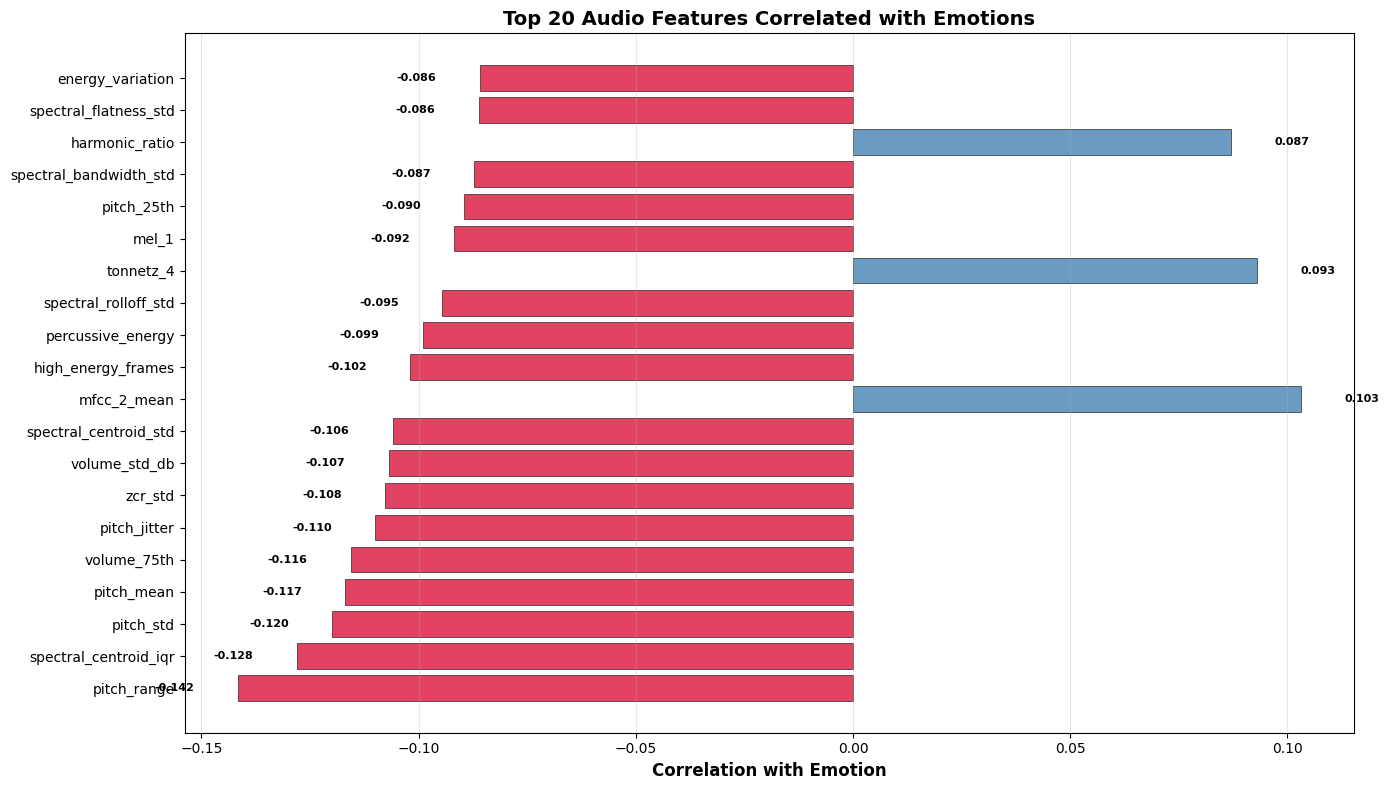

In [26]:
# 1. BAR PLOT: Top Emotion Correlations
plt.figure(figsize=(14, 8))
top_emotion_features = emotion_corr_df.head(20)

colors = ['crimson' if x < 0 else 'steelblue' for x in top_emotion_features['correlation']]
bars = plt.barh(range(len(top_emotion_features)), top_emotion_features['correlation'], 
                color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)

plt.yticks(range(len(top_emotion_features)), top_emotion_features['feature'], fontsize=10)
plt.xlabel('Correlation with Emotion', fontsize=12, fontweight='bold')
plt.title('Top 20 Audio Features Correlated with Emotions', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Add correlation values on bars
for i, (bar, corr) in enumerate(zip(bars, top_emotion_features['correlation'])):
    plt.text(corr + (0.01 if corr > 0 else -0.01), i, f'{corr:.3f}', 
             va='center', ha='left' if corr > 0 else 'right', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

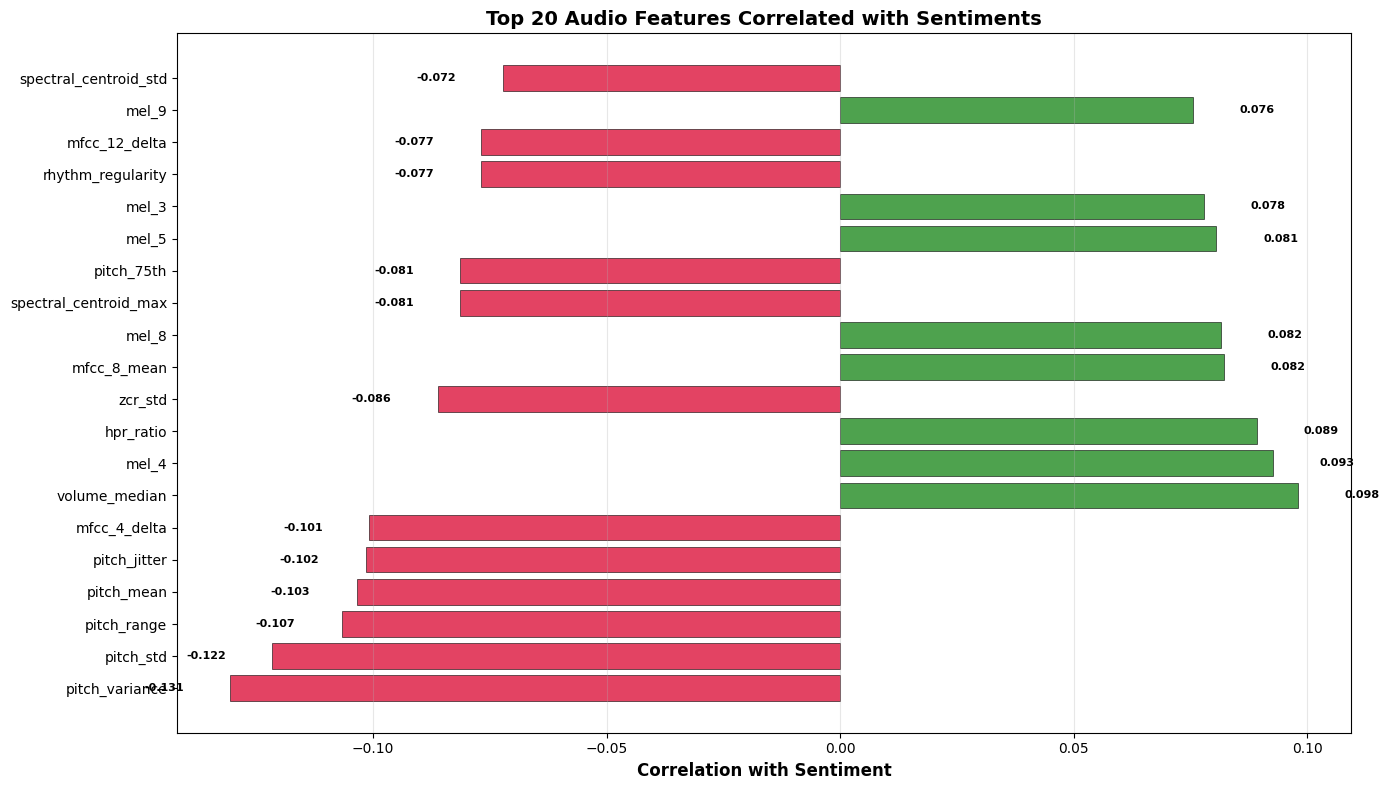

In [27]:

# 2. BAR PLOT: Top Sentiment Correlations
plt.figure(figsize=(14, 8))
top_sentiment_features = sentiment_corr_df.head(20)

colors = ['crimson' if x < 0 else 'forestgreen' for x in top_sentiment_features['correlation']]
bars = plt.barh(range(len(top_sentiment_features)), top_sentiment_features['correlation'], 
                color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)

plt.yticks(range(len(top_sentiment_features)), top_sentiment_features['feature'], fontsize=10)
plt.xlabel('Correlation with Sentiment', fontsize=12, fontweight='bold')
plt.title('Top 20 Audio Features Correlated with Sentiments', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Add correlation values on bars
for i, (bar, corr) in enumerate(zip(bars, top_sentiment_features['correlation'])):
    plt.text(corr + (0.01 if corr > 0 else -0.01), i, f'{corr:.3f}', 
             va='center', ha='left' if corr > 0 else 'right', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

Creating emotion heatmap...


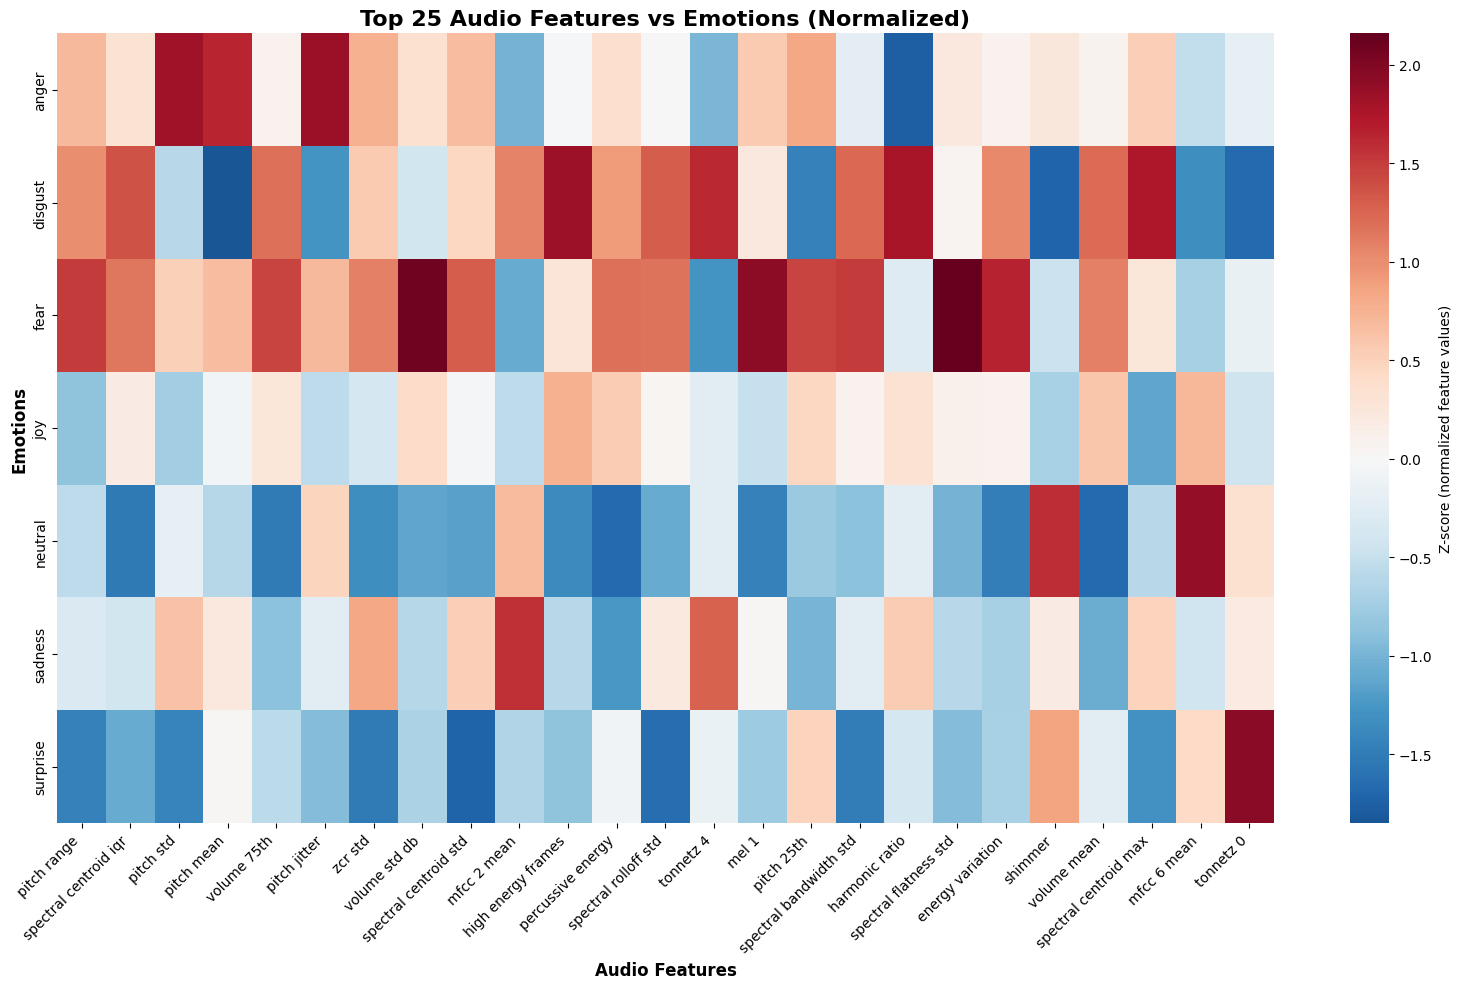

In [28]:
# 3. HEATMAP: Top Features vs Emotions
print("Creating emotion heatmap...")
plt.figure(figsize=(16, 10))

# Get top 25 features for heatmap
top_25_features = emotion_corr_df.head(25)['feature'].tolist()

# Create emotion-feature matrix
emotions = sorted(df['emotion'].unique())
heatmap_data = []

for emotion in emotions:
    emotion_data = df[df['emotion'] == emotion]
    emotion_means = [emotion_data[feature].mean() for feature in top_25_features]
    heatmap_data.append(emotion_means)

# Convert to numpy array and normalize
heatmap_data = np.array(heatmap_data)

# Z-score normalization
from scipy.stats import zscore
heatmap_normalized = zscore(heatmap_data, axis=0)

# Create heatmap
sns.heatmap(heatmap_normalized, 
            xticklabels=[f.replace('_', ' ') for f in top_25_features],
            yticklabels=emotions,
            cmap='RdBu_r',
            center=0,
            annot=False,
            cbar_kws={'label': 'Z-score (normalized feature values)'})

plt.title('Top 25 Audio Features vs Emotions (Normalized)', fontsize=16, fontweight='bold')
plt.xlabel('Audio Features', fontsize=12, fontweight='bold')
plt.ylabel('Emotions', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

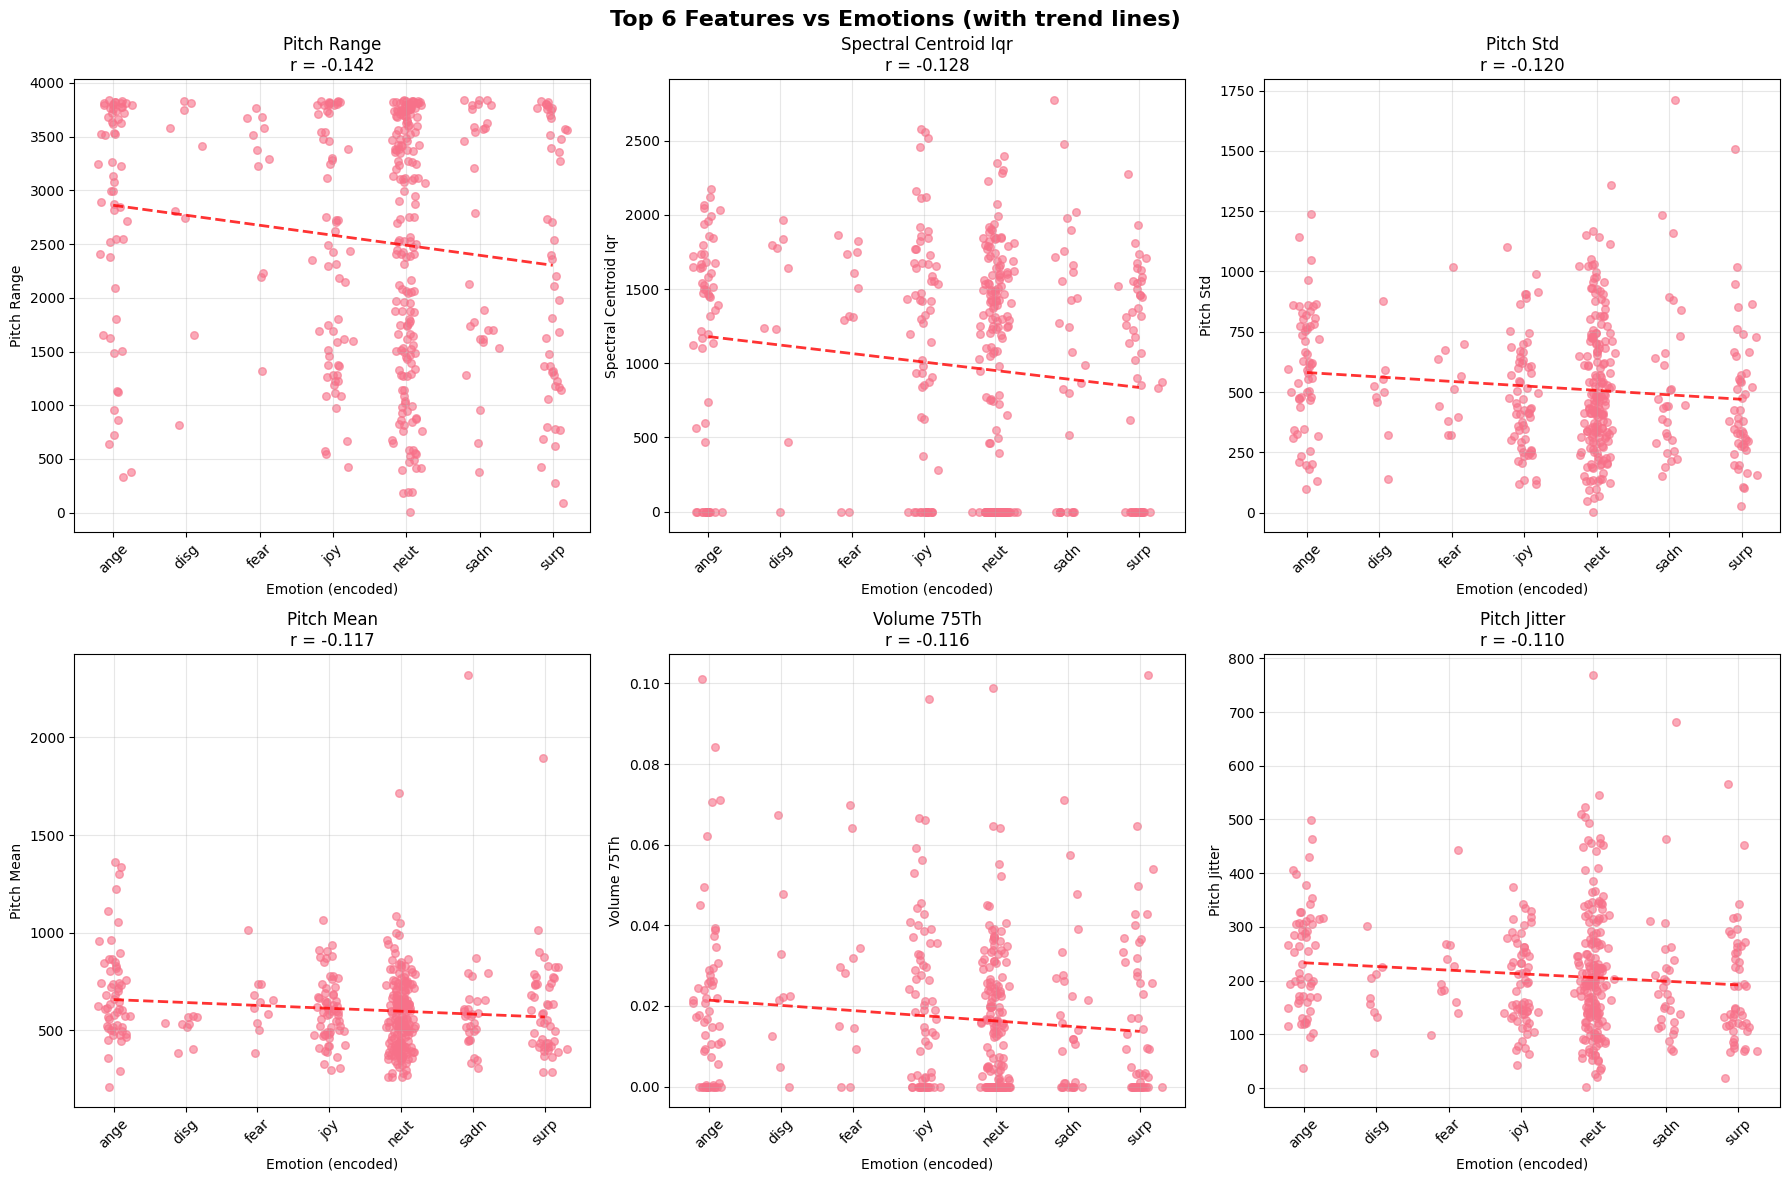

In [29]:
# 4. SCATTER PLOTS: Top Features vs Encoded Emotions
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

top_6_features = emotion_corr_df.head(6)['feature'].tolist()

for i, feature in enumerate(top_6_features):
    ax = axes[i]
    
    # Create scatter plot with jitter
    x_jittered = df['emotion_encoded'] + np.random.normal(0, 0.1, len(df))
    
    ax.scatter(x_jittered, df[feature], alpha=0.6, s=30)
    
    # Add trend line
    z = np.polyfit(df['emotion_encoded'], df[feature], 1)
    p = np.poly1d(z)
    ax.plot(sorted(df['emotion_encoded'].unique()), 
            p(sorted(df['emotion_encoded'].unique())), 
            "r--", alpha=0.8, linewidth=2)
    
    ax.set_xlabel('Emotion (encoded)')
    ax.set_ylabel(feature.replace('_', ' ').title())
    ax.set_title(f'{feature.replace("_", " ").title()}\nr = {emotion_corr_df[emotion_corr_df["feature"]==feature]["correlation"].iloc[0]:.3f}')
    ax.grid(True, alpha=0.3)
    
    # Set emotion labels on x-axis
    ax.set_xticks(range(len(le_emotion.classes_)))
    ax.set_xticklabels([e[:4] for e in le_emotion.classes_], rotation=45)

plt.suptitle('Top 6 Features vs Emotions (with trend lines)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


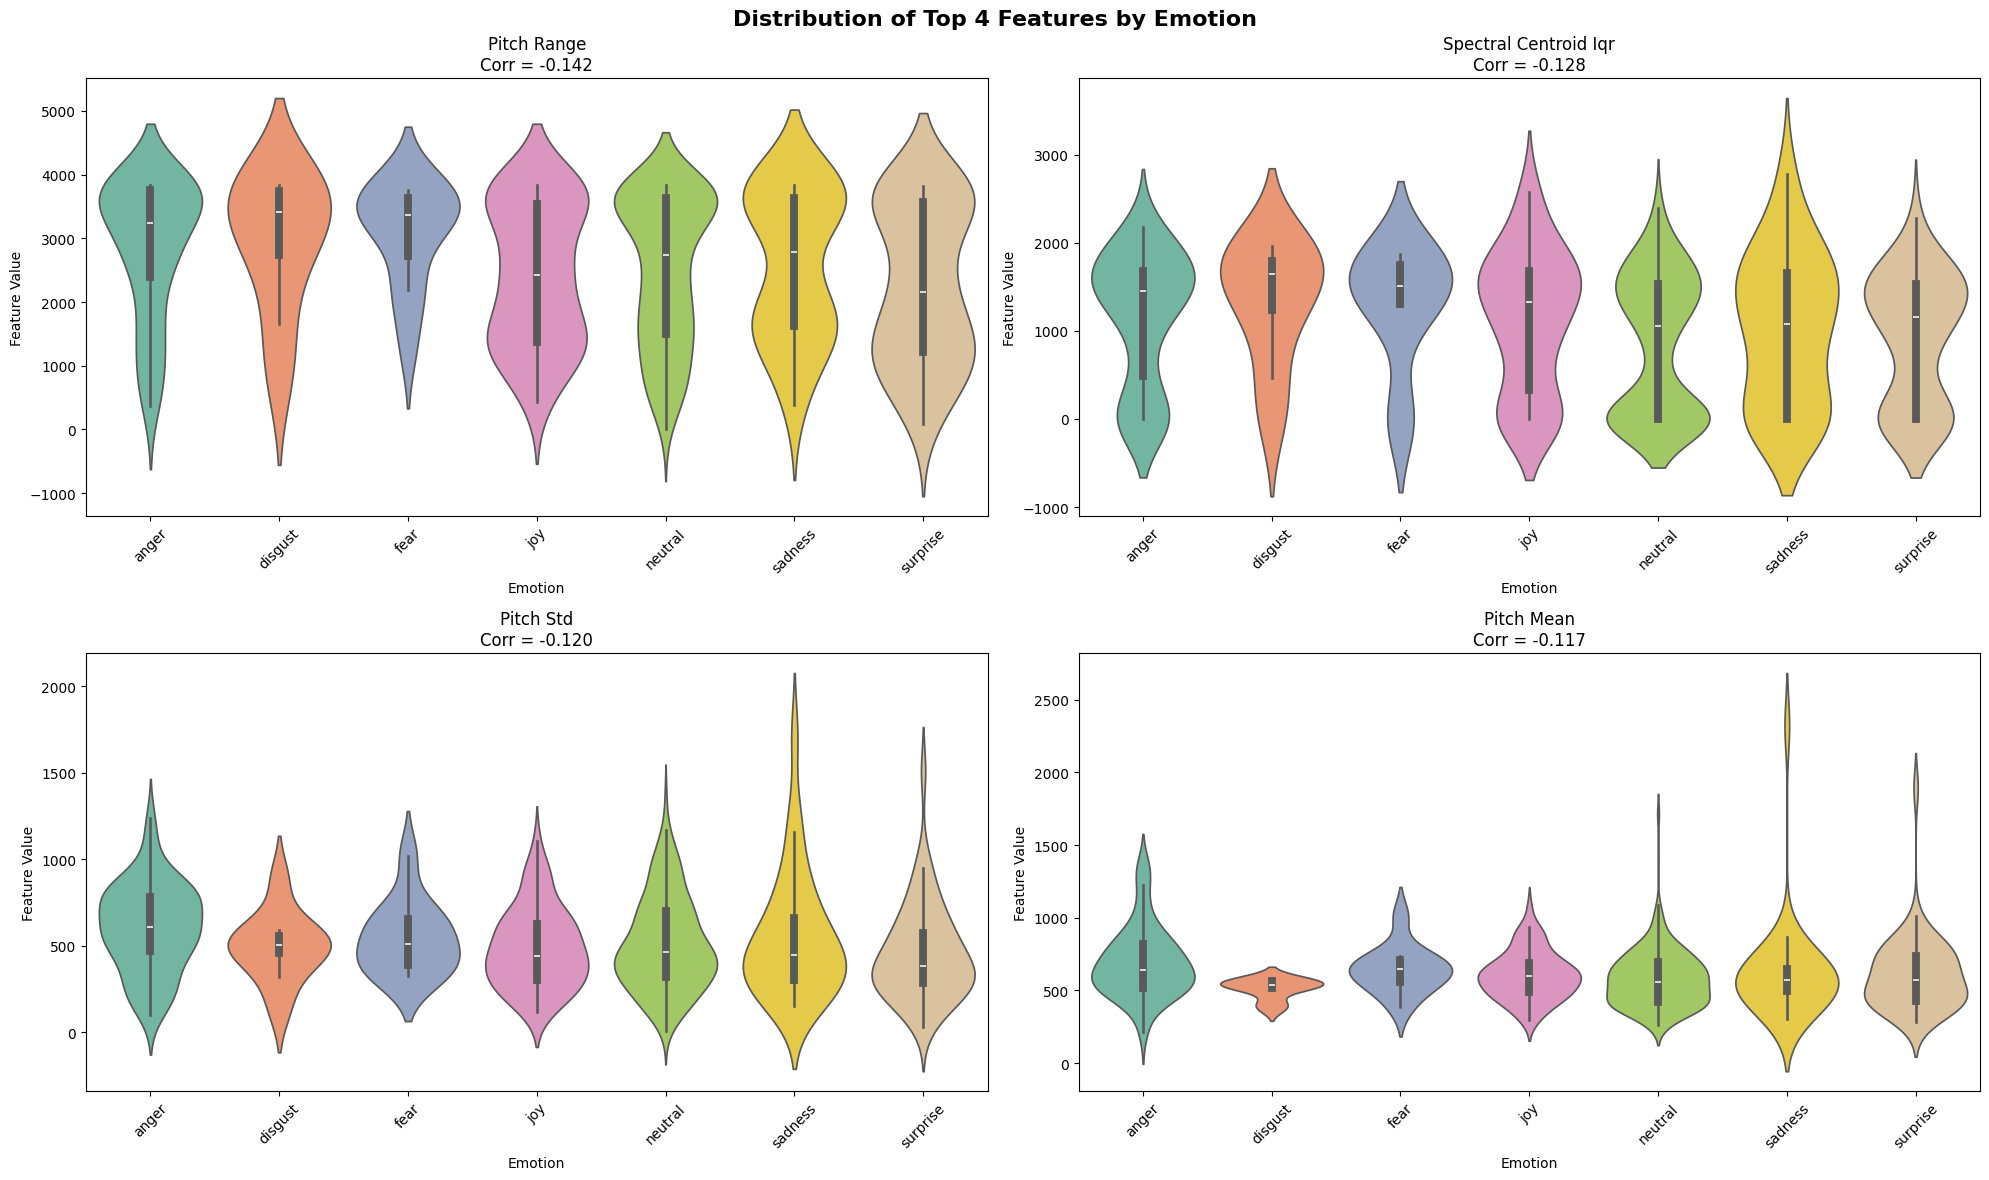

In [30]:
# 5. VIOLIN PLOTS: Feature distributions by emotion
plt.figure(figsize=(20, 12))

# Select top 4 features for detailed analysis
top_4_features = emotion_corr_df.head(4)['feature'].tolist()

for i, feature in enumerate(top_4_features):
    plt.subplot(2, 2, i+1)
    
    # Create violin plot
    emotions_for_plot = []
    values_for_plot = []
    
    for emotion in sorted(df['emotion'].unique()):
        emotion_values = df[df['emotion'] == emotion][feature].values
        emotions_for_plot.extend([emotion] * len(emotion_values))
        values_for_plot.extend(emotion_values)
    
    plot_df = pd.DataFrame({'emotion': emotions_for_plot, 'value': values_for_plot})
    
    sns.violinplot(data=plot_df, x='emotion', y='value', inner='box', palette='Set2')
    plt.title(f'{feature.replace("_", " ").title()}\nCorr = {emotion_corr_df[emotion_corr_df["feature"]==feature]["correlation"].iloc[0]:.3f}')
    plt.xlabel('Emotion')
    plt.ylabel('Feature Value')
    plt.xticks(rotation=45)

plt.suptitle('Distribution of Top 4 Features by Emotion', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [32]:
# 6. SUMMARY STATISTICS TABLE
print("\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)

# Feature type analysis
feature_types = {
    'pitch': [f for f in feature_cols if f.startswith('pitch')],
    'volume': [f for f in feature_cols if f.startswith('volume') or 'energy' in f or 'power' in f],
    'spectral': [f for f in feature_cols if 'spectral' in f or 'zcr' in f],
    'mfcc': [f for f in feature_cols if 'mfcc' in f],
    'chroma': [f for f in feature_cols if 'chroma' in f],
    'temporal': [f for f in feature_cols if 'tempo' in f or 'rhythm' in f or 'beat' in f],
    'advanced': [f for f in feature_cols if 'tonnetz' in f or 'mel_' in f or 'contrast' in f or 'harmonic' in f]
}

print("Average correlation strength by feature type:")
for feature_type, features in feature_types.items():
    if features:
        type_correlations = emotion_corr_df[emotion_corr_df['feature'].isin(features)]['abs_correlation']
        avg_corr = type_correlations.mean()
        max_corr = type_correlations.max()
        print(f"{feature_type.upper():12} : avg = {avg_corr:.3f}, max = {max_corr:.3f}")

# Statistical significance analysis
significant_features = emotion_corr_df[emotion_corr_df['p_value'] < 0.05]
print(f"\nStatistically significant correlations (p < 0.05): {len(significant_features)}/{len(emotion_corr_df)}")
print(f"Highly significant correlations (p < 0.001): {len(emotion_corr_df[emotion_corr_df['p_value'] < 0.001])}")

print("\nDone! All correlation visualizations have been generated.")


SUMMARY STATISTICS
Average correlation strength by feature type:
PITCH        : avg = 0.087, max = 0.142
VOLUME       : avg = 0.062, max = 0.116
SPECTRAL     : avg = 0.060, max = 0.128
MFCC         : avg = 0.048, max = 0.103
CHROMA       : avg = 0.042, max = 0.065
TEMPORAL     : avg = 0.047, max = 0.055
ADVANCED     : avg = 0.041, max = 0.093

Statistically significant correlations (p < 0.05): 12/120
Highly significant correlations (p < 0.001): 0

Done! All correlation visualizations have been generated.
